In [20]:
### Hopf-Lax Minimization for Linear Hamilton Jacobi Reachability
# wsharpless@ucsd.edu

using LinearAlgebra, Plots
push!(LOAD_PATH,"/Users/willsharpless/Library/Mobile Documents/com~apple~CloudDocs/Herbert/Koop_HJR/HL_fastHJR");
using HopfReachability: Hopf_BRS, Hopf_admm, Hopf_cd, intH_ytc17, preH_ytc17, plot_BRS, Hopf

In [21]:
## System
# ẋ = Mx + Cu + C2d subject to y ∈ {(y-a)'Q(y-a) ≤ 1} for y=u,d

dim = 2
M = [0. 1; -2 -3]
C = 0.5 * I
C2 = 0.5 * [2 0; 0 1]
Q = 0.1 * diagm(0 => 3*ones(dim), -1 => 1*ones(dim-1), 1 => 1*ones(dim-1))
Q2 = 0.2 * diagm(0 => 2*ones(dim), -1 => 1*ones(dim-1), 1 => 1*ones(dim-1))
a1 = [0. 0.] #[0.5 0.75]
a2 = [0. 0.] #-[0.5 0]
system = (M, C, C2, Q, Q2, a1, a2);

In [22]:
## Target
# J(x) = 0 is the boundary of the target

Ap = diagm([1, 1])
cp = [0.; 0.]
J(x::Vector, A, c) = ((x - c)' * A * (x - c))/2 - 0.5 #don't need yet
Js(v::Vector, A, c) = (v' * inv(A) * v)/2 + c'v + 0.5
J(x::Matrix, A, c) = diag((x .- c)' * A * (x .- c))/2 .- 0.5
Js(v::Matrix, A, c) = diag(v' * inv(A) * v)/2 + (c'v)' .+ 0.5 #don't need yet
target = (J, Js, (Ap, cp));

In [23]:
## Lookback Time(s)

th = 0.05
Th = 0.1
Tf = 0.7
T = collect(Th : Th : Tf);

In [24]:

## Grid Parameters
bd = (-3, 3)
ϵ = 0.5e-7
N = 10 + ϵ
grid_p = (bd, N)

# Hopf ADMM Parameters (default)
ρ, ρ2 = 1e-4, 1e-4
tol = 1e-5
max_its = 10
opt_p_admm = (ρ, ρ2, tol, max_its)

# # Hopf CD Parameters (default)
vh = 0.01
L = 5
tol = ϵ
lim = 500
lll = 20
max_runs = 20
opt_p_cd = (vh, L, tol, lim, lll, max_runs)

(0.01, 5, 5.0e-8, 500, 20, 20)

In [25]:
## Run the solver (CD)

solution, run_stats = Hopf_BRS(system, target, intH_ytc17, T;
                                                    opt_method=Hopf_cd,
                                                    preH=preH_ytc17,
                                                    th,
                                                    grid_p,
                                                    opt_p=opt_p_cd,
                                                    warm=false,
                                                    check_all=true,
                                                    printing=true);
B⁺T, ϕB⁺T = solution;


Solving Backwards Reachable Set,
   for t=-0.1...


   for t=-0.2...


   for t=-0.3...


   for t=-0.4...


   for t=-0.5...


   for t=-0.6...


   for t=-0.7...


TOTAL TIME: 232.308279416
MEAN TIME[s] PER TIME POINT: Any[0.006825055473259877, 0.007888353198065036, 0.008825295149153454, 0.009367063860521364, 0.009266892390217683, 0.00965023154608976, 0.010607706384842784]
TOTAL POINTS PER TIME POINT: Any[3721, 3721, 3721, 3721, 3721, 3721, 3721]


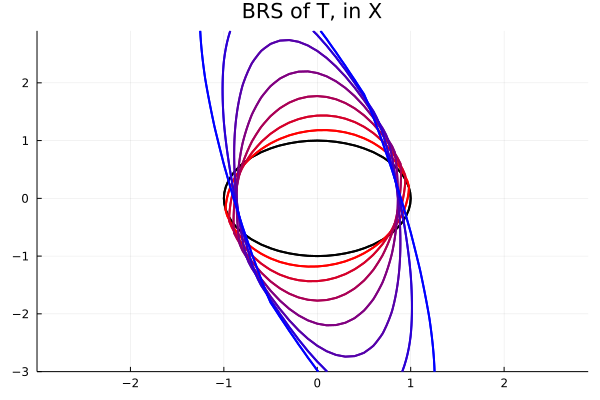

1-element Vector{Plots.Plot{Plots.GRBackend}}:
 Plot{Plots.GRBackend() n=8}

In [26]:
## Pull up the plot

plot = plot_BRS(T, B⁺T, ϕB⁺T; M, cres=0.1, contour=true)

In [27]:
## Run the solver (ADMM)

solution, run_stats = Hopf_BRS(system, target, intH_ytc17, T;
                                                    opt_method=Hopf_admm,
                                                    preH=preH_ytc17,
                                                    th,
                                                    grid_p,
                                                    opt_p=opt_p_admm,
                                                    warm=false,
                                                    check_all=true,
                                                    printing=true);
B⁺T, ϕB⁺T = solution;


Solving Backwards Reachable Set,
   for t=-0.1...


   for t=-0.2...


   for t=-0.3...


   for t=-0.4...


   for t=-0.5...


   for t=-0.6...


   for t=-0.7...


TOTAL TIME: 15.028770125
MEAN TIME[s] PER TIME POINT: Any[0.00035756546170384303, 0.000452516930932545, 0.0005246492991131417, 0.0005949326234883095, 0.0006390007054555227, 0.0007017349615694705, 0.0007675020604676163]
TOTAL POINTS PER TIME POINT: Any[3721, 3721, 3721, 3721, 3721, 3721, 3721]


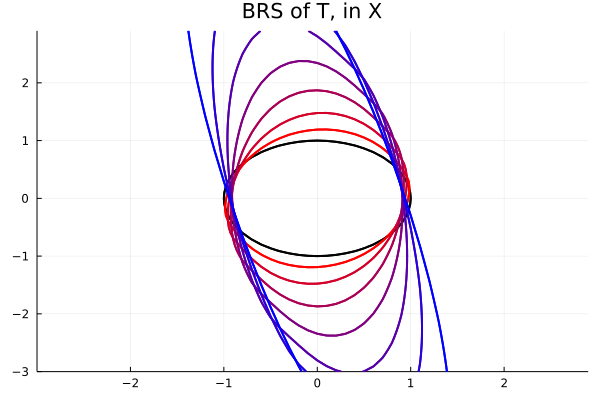

1-element Vector{Plots.Plot{Plots.GRBackend}}:
 Plot{Plots.GRBackend() n=8}

In [28]:
## Pull up the plot

plot = plot_BRS(T, B⁺T, ϕB⁺T; M, cres=0.1, contour=true)

Note, there are minor differences between the plotted BRS computations of the two methods. Rigorous comparison with Lax-Friedrichs method's will be coming but at first glance ADMM (as suspected) appears to be more accurate.